# Impatti dell'alcol sui giovani

In [1]:
#import library 

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Import Dataset

In [2]:
por = pd.read_csv('dataset/dataset/student-por.csv')

In [3]:
por.columns.values

array(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G1', 'G2', 'G3'], dtype=object)

In [4]:
por.shape

(649, 33)

In [5]:
len(por[por.duplicated()])

0

In [6]:
por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

Trasformo le varibili categoriche in variabili numeriche tramite le classi OneHotEncoder e LabelEncoder

In [7]:
label_encoders = {}
onehot_encoders = {}
mapping = {}  # LabelEncoder mapping dictionary

In [8]:
categorical_columns = por.select_dtypes(exclude=['number']).columns

categorical_binary_columns = []
categorical_not_binary_columns = []


for col in categorical_columns:
        if por.nunique()[col] == 2:
                categorical_binary_columns.append(col)
        else:
               categorical_not_binary_columns.append(col)

In [9]:
# Encoding non-binary variables with OneHotEncoder and updating the mapping
for col in categorical_not_binary_columns:
    onehot_encoders[col] = OneHotEncoder(categories='auto', drop='if_binary')
    encoded_values = onehot_encoders[col].fit_transform(por[[col]])
    encoded_df = pd.DataFrame(encoded_values.toarray(), columns=onehot_encoders[col].get_feature_names_out([col]))
    por = pd.concat([por, encoded_df], axis=1)
    
    # Update the mapping
    mapping[col] = {i: cat for i, cat in enumerate(onehot_encoders[col].categories_[0])}

    por.drop(columns=[col], inplace=True)

In [10]:
# Encoding binary variables with LabelEncoder and updating the mapping
for col in categorical_binary_columns:
    label_encoders[col] = LabelEncoder()
    por[col] = label_encoders[col].fit_transform(por[col])
    
    # Update the mapping
    mapping[col] = {i: cat for i, cat in enumerate(label_encoders[col].classes_)}

In [11]:
por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 46 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   school             649 non-null    int64  
 1   sex                649 non-null    int64  
 2   age                649 non-null    int64  
 3   address            649 non-null    int64  
 4   famsize            649 non-null    int64  
 5   Pstatus            649 non-null    int64  
 6   Medu               649 non-null    int64  
 7   Fedu               649 non-null    int64  
 8   traveltime         649 non-null    int64  
 9   studytime          649 non-null    int64  
 10  failures           649 non-null    int64  
 11  schoolsup          649 non-null    int64  
 12  famsup             649 non-null    int64  
 13  paid               649 non-null    int64  
 14  activities         649 non-null    int64  
 15  nursery            649 non-null    int64  
 16  higher             649 non

Durante questa analisi andremo a vedere:

- quando si beve di più: durante il weekend o durante la settimana

In [12]:
alc_cons = por[['Dalc', 'Walc']].copy()
alc_cons['GAP'] = alc_cons.Walc - alc_cons.Dalc

In [37]:
print('alc_cons.Dalc.mean()', round(alc_cons.Dalc.mean(), 2))
print('alc_cons.Walc.mean()', round(alc_cons.Walc.mean(), 2))

alc_cons.Dalc.mean() 1.5
alc_cons.Walc.mean() 2.28


In [29]:
# Creare l'istogramma con Plotly
fig = go.Figure()

# Aggiungere l'istogramma
fig.add_trace(go.Histogram(
    x=alc_cons['GAP'],
    nbinsx=9,
    marker_color='#A054B7',
    opacity=0.75
))

# Aggiungere titolo e etichette degli assi
fig.update_layout(
    title='Distribuzione del Gap tra il Consumo di Alcol nel Weekend e durante la Settimana',
    xaxis_title='Gap (Walc - Dalc)',
    yaxis_title='Frequenza',
    bargap=0.0,
    template='simple_white'
)

# Mostrare il grafico
fig.show()


In [28]:
alc_cons.groupby('GAP')['GAP'].count()

GAP
-4      1
-3      2
-2      2
-1      8
 0    304
 1    182
 2    110
 3     35
 4      5
Name: GAP, dtype: int64

<b>Prendiamo in considerazione i valori di correlazione di Walc e Dalc con le altre feature</b>

In [62]:
# Calcolare la matrice di correlazione
correlation_matrix = por.corr()

# Estrarre le correlazioni di 'Dalc' e 'Walc'
dalc_corr = correlation_matrix['Dalc'].drop(['Dalc', 'Walc'])
walc_corr = correlation_matrix['Walc'].drop(['Dalc', 'Walc'])


In [67]:
# Estrarre i valori assoluti delle correlazioni di 'Dalc'
abs_dalc_corr = dalc_corr.abs()
# Ordinare i valori in modo discendente
abs_dalc_corr_sort = abs_dalc_corr.sort_values(ascending=False)

# Estrarre i valori assoluti delle correlazioni di 'Walc'
abs_walc_corr = walc_corr.abs()
# Ordinare i valori in modo discendente
abs_walc_corr_sort = abs_walc_corr.sort_values(ascending=False)

In [77]:
abs_dalc_corr_sort.index

Index(['goout', 'G3', 'G1', 'G2', 'absences', 'studytime'], dtype='object')

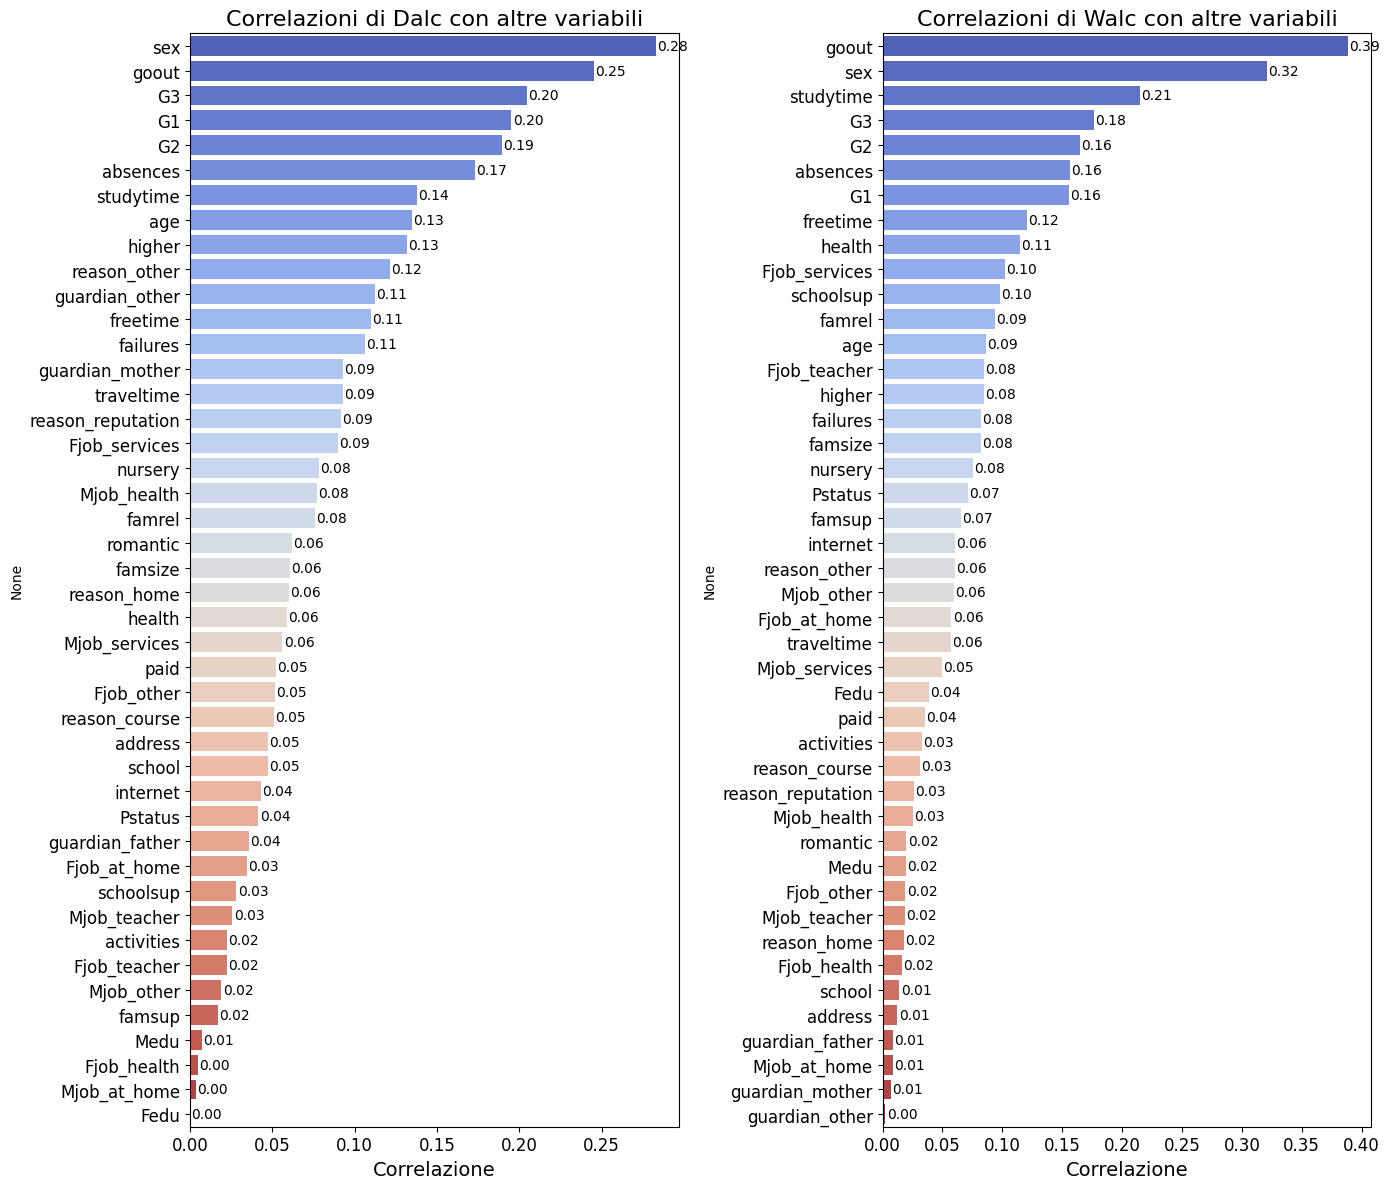

In [90]:
# Settaggi per aumentare la dimensione del font
font_title = {'size': 16}
font_labels = {'size': 14}

# Creare un grafico a barre per le correlazioni di 'Dalc'
plt.figure(figsize=(14, 12))

plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=abs_dalc_corr_sort.index, x=abs_dalc_corr_sort, palette='coolwarm', hue=abs_dalc_corr_sort.index, dodge=False)
plt.title('Correlazioni di Dalc con altre variabili', fontdict=font_title)
plt.xlabel('Correlazione', fontdict=font_labels)
#plt.ylabel('Variabile', fontdict=font_labels)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Aggiungere i valori di correlazione sopra le barre
for p in ax1.patches:
    ax1.annotate(format(p.get_width(), '.2f'), 
                  (p.get_width(), p.get_y() + p.get_height() / 2.), 
                  ha = 'center', va = 'center', 
                  xytext = (12, 0), 
                  textcoords = 'offset points')

# Creare il secondo subplot per le correlazioni di 'Walc'
plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=abs_walc_corr_sort.index, x=abs_walc_corr_sort, palette='coolwarm', hue=abs_walc_corr_sort.index, dodge=False)
plt.title('Correlazioni di Walc con altre variabili', fontdict=font_title)
plt.xlabel('Correlazione', fontdict=font_labels)
#plt.ylabel('Variabile', fontdict=font_labels)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Aggiungere i valori di correlazione sopra le barre
for p in ax2.patches:
    ax2.annotate(format(p.get_width(), '.2f'), 
                  (p.get_width(), p.get_y() + p.get_height() / 2.), 
                  ha = 'center', va = 'center', 
                  xytext = (12, 0), 
                  textcoords = 'offset points')

plt.tight_layout()
plt.show()

Notiamo che le maggiori correlazioni sono con le seguenti variabili (valore di correlazione > 0.2):
 - sex
 - goout
 - studytime
 - G3